## Practice: Data Trip

In this practice assignment, we'll explore a [dataset of taxi trips in NYC](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) and a famous [dataset of passengers on the Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

### Data Inspection

To start, let's imagine that we're building a new NYC transportation app and want to better understand how travelers are currently using taxi services. We've been given a dataset of taxi trips from the past 30 days, which we'll explore for patterns and insights.

Before we can load the data and inspect it, we'll need to import some Python libraries for data analysis.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('The libraries are loaded')

The libraries are loaded


Next, we'll read in the data and inspect the first few rows. This will help us figure out what kind of data we have.

In [2]:
# Import data
taxis = pd.read_csv('taxis.csv')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


We can use the `.info()` method to inspect some information about this dataframe.

[Function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

In [3]:
# Look at data info (missing values, size, column names, data types, etc.)
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


It is often helpful to check the Dtypes. Quantitative columns should be stored as ints or floats so that we can perform numerical operations on them.

Note that there are 6433 values in the first eight columns; some of the others have missing values. Let's take a closer look at some of the rows with null values.

In [4]:
# How many null values in each column?
taxis.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [5]:
# Print rows with null values in the dropoff_zone column
# .head(5) subsets to the first 5 rows so we don't overwhelm ourselves
taxis[taxis.dropoff_zone.isnull()].head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.0,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.0,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN


Note that:

- All rows with missing pickup zones also have missing pickup boroughs (and the same is true for dropoffs). This makes sense and also aligns with the output above showing equal numbers of missing values in those pairs of columns
- There are many rows where both pickup and dropoff locations are missing

Best guess: Maybe these trips involve a pickup and/or dropoff outside of NYC. How could we investigate this? Maybe the distance traveled provides some clues.

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Print the rows where the payment method is missing. Do you have any theories as to why this data is missing for those rows?**

In [6]:
# Print rows with null values in the payment column
###
null_payments = taxis[taxis['payment'].isnull()]
print(f"number of rows having null payments is {null_payments.shape[0]}")
null_payments.head()
###


number of rows having null payments is 44


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.0,11.8,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.0,6.3,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.0,5.8,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.0,15.8,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.0,11.8,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan


<hr style="border:2px solid gray"> </hr>

Next, we can use the `.describe()` method to get summary statistics for each column.

[More information on `.describe()`](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

In [7]:
# Use the .describe() method to print summary statistics for all columns of taxis
# Note: include = 'all' indicates all columns, including categorical ones
taxis.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pickup,6433,6414,2019-03-13 10:57:06,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff,6433,6425,2019-03-04 18:08:13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passengers,6433.0,NaN,NaN,NaN,1.539251,1.203768,0.0,1.0,1.0,2.0,6.0
distance,6433.0,NaN,NaN,NaN,3.024617,3.827867,0.0,0.98,1.64,3.21,36.7
fare,6433.0,NaN,NaN,NaN,13.091073,11.551804,1.0,6.5,9.5,15.0,150.0
tip,6433.0,NaN,NaN,NaN,1.97922,2.44856,0.0,0.0,1.7,2.8,33.2
tolls,6433.0,NaN,NaN,NaN,0.325273,1.415267,0.0,0.0,0.0,0.0,24.02
total,6433.0,NaN,NaN,NaN,18.517794,13.81557,1.3,10.8,14.16,20.3,174.82
color,6433,2,yellow,5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment,6389,2,credit card,4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that different summary statistics are calculated for the numerical columns compared to the columns that are stored as strings.

### Summary Statistics for Quantitative Data
Let's take a deep dive into some of the quantitative variables in our dataset. For quantitative data, we often want to describe central tendency (typical values) and spread (variation). For example, we could use the mean or median to summarize a typical taxi fare.

In [8]:
# Calculate median fare
median_fare = taxis.fare.median()
print('median fare: ', median_fare)

# Calculate mean (average) fare
mean_fare = taxis.fare.mean()
print('mean fare: ', mean_fare)

median fare:  9.5
mean fare:  13.091072594434944


<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Your turn! Calculate and print the standard deviation of fares below. Check your result against the output from `.describe()` to ensure that you calculated it correctly.**

Feel free to reference this [resource on pandas methods for descriptive statistics](https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm) if you don't know the function to calculate standard deviation already!

In [9]:
# Calculate standard deviation of fare
###
n = taxis['fare'].shape[0]   
bracket = pow(taxis["fare"]-taxis["fare"].mean(),2)
summation = np.sum(bracket)
standard_deviation = np.sqrt((1/n) * summation)
standard_deviation


11.550906376376895

<hr style="border:2px solid gray"> </hr>

### Visualizing a Distribution of Quantitative Data
We may also want to do visualize the distribution of fares using a plot. We have some evidence from the difference between the mean and median that fares will be right skewed.

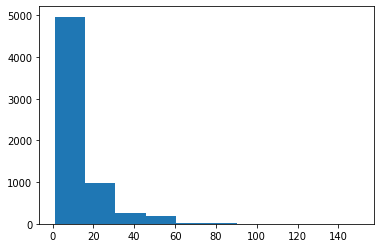

In [10]:
# Visualize the distribution of fares with a histogram
plt.hist(x = 'fare', data = taxis)
plt.show()

To get a more detailed view, we could either change the number of bins in the histogram or use a different visualization, such as a KDE plot, violin plot, or box plot.

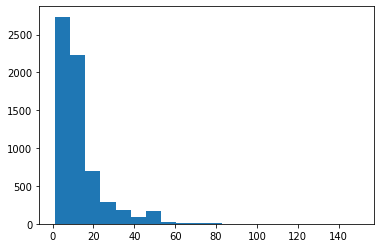

In [11]:
# Increase the number of bins to 20
plt.hist(x = 'fare', data = taxis, bins = 20)
plt.show()

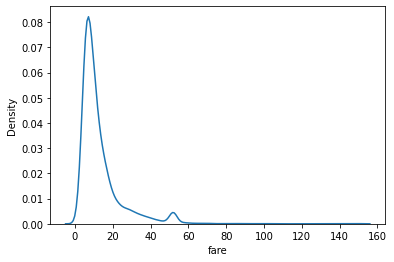

In [12]:
# Visualize the distribution of fares with a KDE plot
sns.kdeplot(x = 'fare', data = taxis)
plt.show()

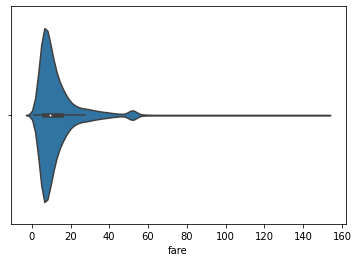

In [13]:
# Visualize the distribution of fares with a violin plot
sns.violinplot(x = 'fare', data = taxis)
plt.show()

Based on all of these plots, we see that fares tend to be between 0-40 dollars, with some trips costing up to around 160 dollars.

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Use the `sns.boxplot()` function below to make a box plot of age.**

Hint: the syntax is exactly the same as `sns.violinplot()`, but you'll use the `sns.boxplot()` function instead.

In [14]:
# Visualize the distribution of age with a box plot
###
# Where is age column in taxis dataset ?
###


<hr style="border:2px solid gray"> </hr>

### Inspecting Outliers
Based on the distribution plots, we see that there are some outliers in the fare column. If we want to probe further, we can take a look at those rows.

In [15]:
# Print rows where fare is greater than 100
taxis[taxis.fare > 100]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
2231,2019-03-11 10:17:31,2019-03-11 11:03:55,1,26.35,130.0,0.00,5.76,136.56,yellow,cash,East Harlem North,NaN,Manhattan,NaN
3644,2019-03-19 23:30:50,2019-03-19 23:32:33,2,0.00,103.0,20.65,0.00,123.95,yellow,credit card,NaN,NaN,NaN,NaN
4050,2019-03-13 14:05:19,2019-03-13 15:01:16,6,33.76,143.5,0.00,0.00,144.30,yellow,cash,LaGuardia Airport,NaN,Queens,NaN
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.0,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
5648,2019-03-19 14:21:35,2019-03-19 15:51:28,2,33.46,150.0,0.00,18.90,169.70,green,cash,East Flushing,NaN,Queens,NaN


Many of the highest fare trips seem to have missing dropoff or pickup locations. Interestingly, there's one trip that picked up and dropped off at JFK, but traveled 36.7 miles in between!

### Empirical Cumulative Distribution Function (ECDF)
Another way to inspect the distribution of fares is by using an empirical cumulative distribution function. This allows us to estimate the percentiles very easily.

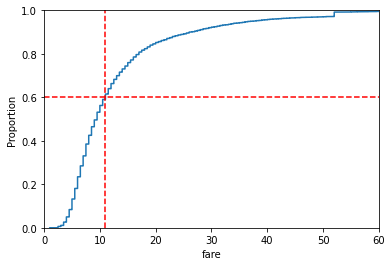

In [16]:
sns.ecdfplot(x='fare', data = taxis)
plt.axhline(0.6, color='red', linestyle = '--')
plt.axvline(11, color='red', linestyle = '--')
plt.xlim(0,60)
plt.show()

For example, the red dotted lines show that about 60% of fares are less than 11 dollars. (The 60th percentile of fares is 11 dollars).

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**Estimate the 80th percentile for fares (in other words, 80% of fares are below what value?). To help you estimate, you may want to copy and edit the code for the above plot to move the two red dotted lines.**

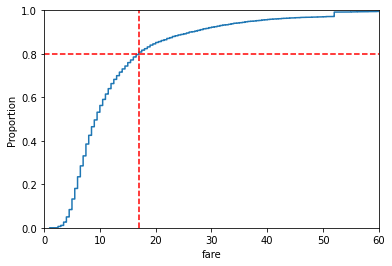

In [17]:
# YOUR EDITED PLOTTING CODE GOES HERE
###
sns.ecdfplot(x='fare', data = taxis)
plt.axhline(0.8, color='red', linestyle = '--')
plt.axvline(17, color='red', linestyle = '--')
plt.xlim(0,60)
plt.show()
###


In [74]:
# YOUR ESTIMATE OF THE 80TH PERCENTILE GOES HERE
###
percentile_80 = 17
percentile_80
###


17

<hr style="border:2px solid gray"> </hr>

### Summary Statistics and Data Visualization for Categorical Data
For categorical variables, we'll need different summary statistics and data visualizations to understand the distribution of observations. For example, we may want to calculate the number or proportion of observations in each category.

In [19]:
# Calculate the number of trips starting in each pickup zone
taxis.pickup_zone.value_counts(dropna=False)

Midtown Center                  230
Upper East Side South           211
Penn Station/Madison Sq West    210
Clinton East                    208
Midtown East                    198
                               ... 
Dyker Heights                     1
Queens Village                    1
Pelham Parkway                    1
Hunts Point                       1
Hillcrest/Pomonok                 1
Name: pickup_zone, Length: 195, dtype: int64

In [20]:
# Calculate the proportion of trips starting in each pickup zone
taxis.pickup_zone.value_counts(normalize=True, dropna=False)

Midtown Center                  0.035753
Upper East Side South           0.032800
Penn Station/Madison Sq West    0.032644
Clinton East                    0.032333
Midtown East                    0.030779
                                  ...   
Dyker Heights                   0.000155
Queens Village                  0.000155
Pelham Parkway                  0.000155
Hunts Point                     0.000155
Hillcrest/Pomonok               0.000155
Name: pickup_zone, Length: 195, dtype: float64

Note that there are a number of zones that only have 1 pick-up represented in the data. If we're going to visualize this, we may want to collapse some of these into an "other" category. Otherwise, a bar chart of this column would look very crowded.

In [21]:
# Take a look at all the counts
tbl = taxis.pickup_zone.value_counts(dropna=False)
tbl.values

array([230, 211, 210, 208, 198, 186, 184, 180, 177, 162, 152, 151, 146,
       144, 141, 141, 131, 120, 110, 109, 108, 106, 102,  97,  96,  96,
        93,  93,  90,  83,  80,  77,  77,  72,  71,  70,  68,  67,  65,
        63,  60,  58,  53,  50,  47,  47,  43,  42,  40,  39,  37,  35,
        35,  34,  32,  31,  26,  26,  24,  24,  23,  22,  21,  20,  20,
        18,  17,  16,  15,  15,  14,  12,  12,  12,  11,  11,  11,  11,
        11,  10,  10,   9,   9,   9,   9,   9,   9,   8,   8,   8,   8,
         7,   7,   7,   7,   7,   7,   6,   6,   6,   6,   6,   5,   5,
         5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [22]:
# Let's grab the names of all zones with less than 100 trips
low_zones = tbl.index[tbl.values <100]

# And then replace all of those values with 'other'
taxis.loc[taxis.pickup_zone.isin(low_zones), 'pickup_zone'] = 'other'

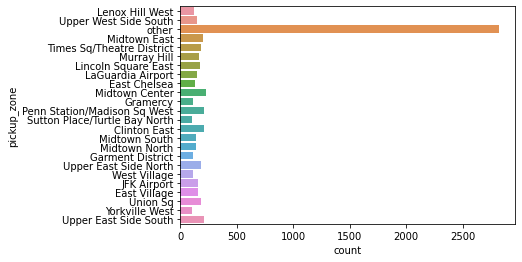

In [23]:
# Now let's inspect using a bar chart
sns.countplot(y = 'pickup_zone', data = taxis)
plt.show()

Note that it's hard to compare the bar heights because the "other" category is so large. We can fix that by removing "other" from our plot.

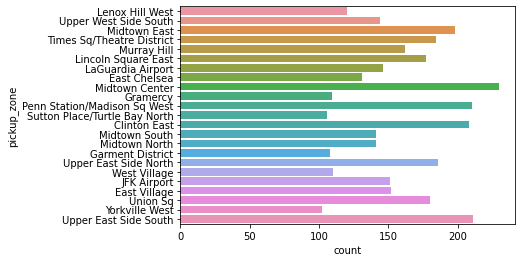

In [24]:
# Replot without that category
df_sub = taxis[taxis.pickup_zone != 'other']
sns.countplot(y = 'pickup_zone', data = df_sub)
plt.show()

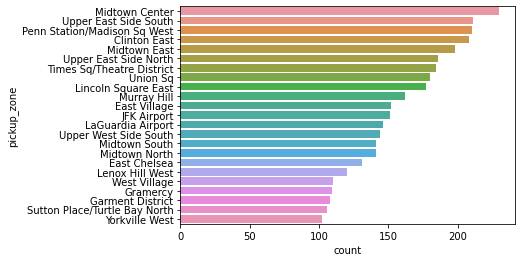

In [25]:
# And now let's order the bars
sns.countplot(y = 'pickup_zone', 
              data = df_sub,
              order = df_sub.pickup_zone.value_counts().index)
plt.show()

<hr style="border:2px solid gray"> </hr>

#### YOU TRY

**How many different payment options are there? Do more people pay with cash or with a credit card? In the space below, calculate the number of trips that paid with each payment method, the proportion of trips that paid with each payment method, and graph a bar chart to visualize these numbers.**

For a challenge, see if you can figure out how to include the missing values in the bar chart!

In [85]:
# Calculate the number of trips paid with each payment option
###
taxis['payment'].fillna("null",inplace = True)
answer = taxis['payment'].value_counts()
answer
###


credit card    4577
cash           1812
null             44
Name: payment, dtype: int64

In [91]:
# Calculate the proportion of trips paid with each payment option
###
credit_card = taxis[taxis['payment'] == 'credit card'].shape[0] / (taxis['payment'].shape[0]) * 100
cash = taxis[taxis['payment'] == 'cash'].shape[0] / (taxis['payment'].shape[0]) * 100
nulls = taxis[taxis['payment'] == 'null'].shape[0]/(taxis['payment'].shape[0]) * 100
a ='{0:.3g}'.format(credit_card)
b ='{0:.3g}'.format(cash)
c = '{0:.3g}'.format(nulls)
print(f"the proportions is {a} % with credit card and {b} % with cash , while there is {c} % nulls".format(".2f%",".2f%"))
###


the proportions is 71.1 % with credit card and 28.2 % with cash , while there is 0.684 % nulls


<AxesSubplot:xlabel='payment', ylabel='count'>

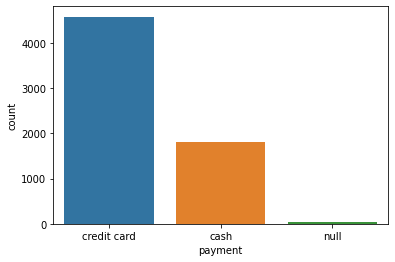

In [92]:
# Create a bar chart of payment options
###
sns.countplot(x='payment',data = taxis , order = taxis['payment'].value_counts().index)
###


<hr style="border:2px solid gray"> </hr>

## Practice on Your Own

Complete the following prompts to practice your skills. 

We've loaded some new data for you that includes information about passengers on the Titanic. For more information about the dataset, you can [read about it on Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv).

In [94]:
# Load data as titanic
titanic = pd.read_csv('titanic.csv')
titanic['pclass'].unique()

array([3, 1, 2])

#### 1. Inspect the dataset. How much data is there? Which columns (if any) have missing data and how much?

In [60]:
# 1
###
no_rows = titanic.shape[0]
no_columns = titanic.shape[1]
print(f"Titanic has {no_rows} rows and {no_columns} columns")
column_names = titanic.columns
titanic.isnull().sum()
###


Titanic has 891 rows and 8 columns


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
dtype: int64

#### 2. There are two passengers who have missing data for the `embark_town` column. Print out the rows that correspond to those two passengers and inspect them. Do you have any guesses as to why the embark_town field is missing for them?

In [62]:
# 2
###
missing_two = titanic[titanic["embark_town"].isnull()]
missing_two
###


,survived,pclass,sex,age,sibsp,parch,fare,embark_town
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


#### 3. Calculate (and print) the mean, median, standard deviation, minimum, 25th percentile, 75th percentile, and maximum of the `fare` variable. Inspect the output. What is a typical fare?

In [65]:
# 3
###
titanic['fare'].describe()
###


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Average fare was 32.20 euros, but median fare was only 14.45 euros, signaling that this is very right skewed. Typical fare seems to be about 8-30 euros.

#### 4. To visualize the distribution of fares, create at least one distribution plot. For example, you could use a histogram, kdeplot, violin plot, or ECDF. Inspect the plot. What does this tell you about the fares?

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

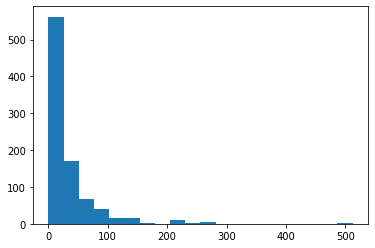

In [68]:
# 4
###
plt.hist(x = 'fare', data = titanic, bins = 20)
###


#### 5. There are three outliers who paid significantly higher fares than everyone else. print out those rows and inspect them. What can you learn about those passengers?

In [69]:
# 5
###
higher = titanic[titanic["fare"] > 450]
higher
# I believe that these individuals are related as they both paid the same fee, have nearly the same age 
# and are from the same town
###


,survived,pclass,sex,age,sibsp,parch,fare,embark_town
258,1,1,female,35.0,0,0,512.3292,Cherbourg
679,1,1,male,36.0,0,1,512.3292,Cherbourg
737,1,1,male,35.0,0,0,512.3292,Cherbourg


#### 6. Create a bar chart of the locations where passengers embarked (`embark_town`). Where did most of the passengers embark?

<AxesSubplot:xlabel='embark_town', ylabel='count'>

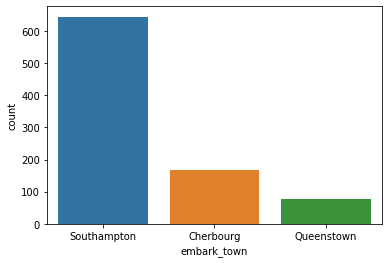

In [73]:
# 6
###
sns.countplot(x = 'embark_town' , data = titanic, order = titanic['embark_town'].value_counts().index)
###
## The most number of people, embarked from Southhampton
